In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:


try:
    df_additional = pd.read_csv('bank-additional.csv', sep=';')
    df_additional_full = pd.read_csv('bank-additional-full.csv', sep=';')
    df_bank = pd.read_csv('bank.csv', sep=';')
    df_bank_full = pd.read_csv('bank-full.csv', sep=';')

    with open('bank-additional-names.txt', 'r') as file:
        column_names_text = file.read()

    display(df_additional.head())
    print(df_additional.shape)
    display(df_additional_full.head())
    print(df_additional_full.shape)
    display(df_bank.head())
    print(df_bank.shape)
    display(df_bank_full.head())
    print(df_bank_full.shape)

except FileNotFoundError:
    print("One or more files not found.")
except pd.errors.ParserError:
    print("Error parsing one or more CSV files. Check delimiters and encoding.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


(4119, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


(41188, 21)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


(45211, 17)



Exploring df_additional:
Shape: (4119, 21)
Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
Descriptive Statistics:
                age     job  marital          education default housing  loan  \
count   4119.000000    4119     4119               4119    4119    4119  4119   
unique          NaN      12        4                  8       3       3     3   
top             NaN  admin.  married  university.degree      no     yes    no   
freq            NaN    1012     2509

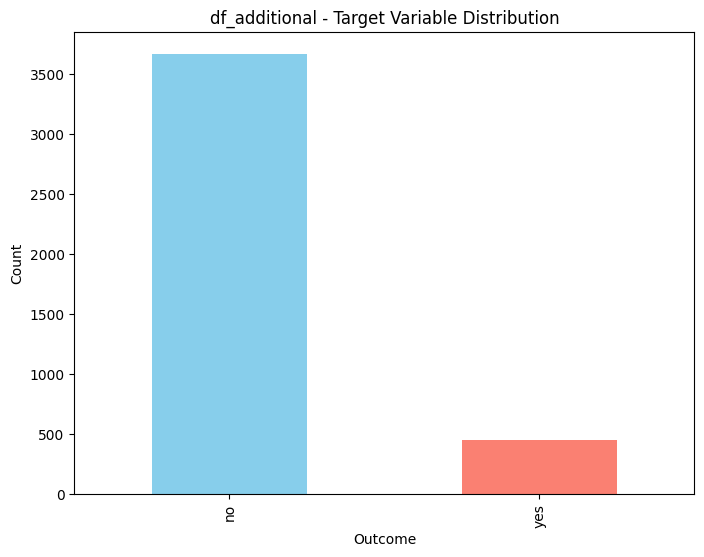

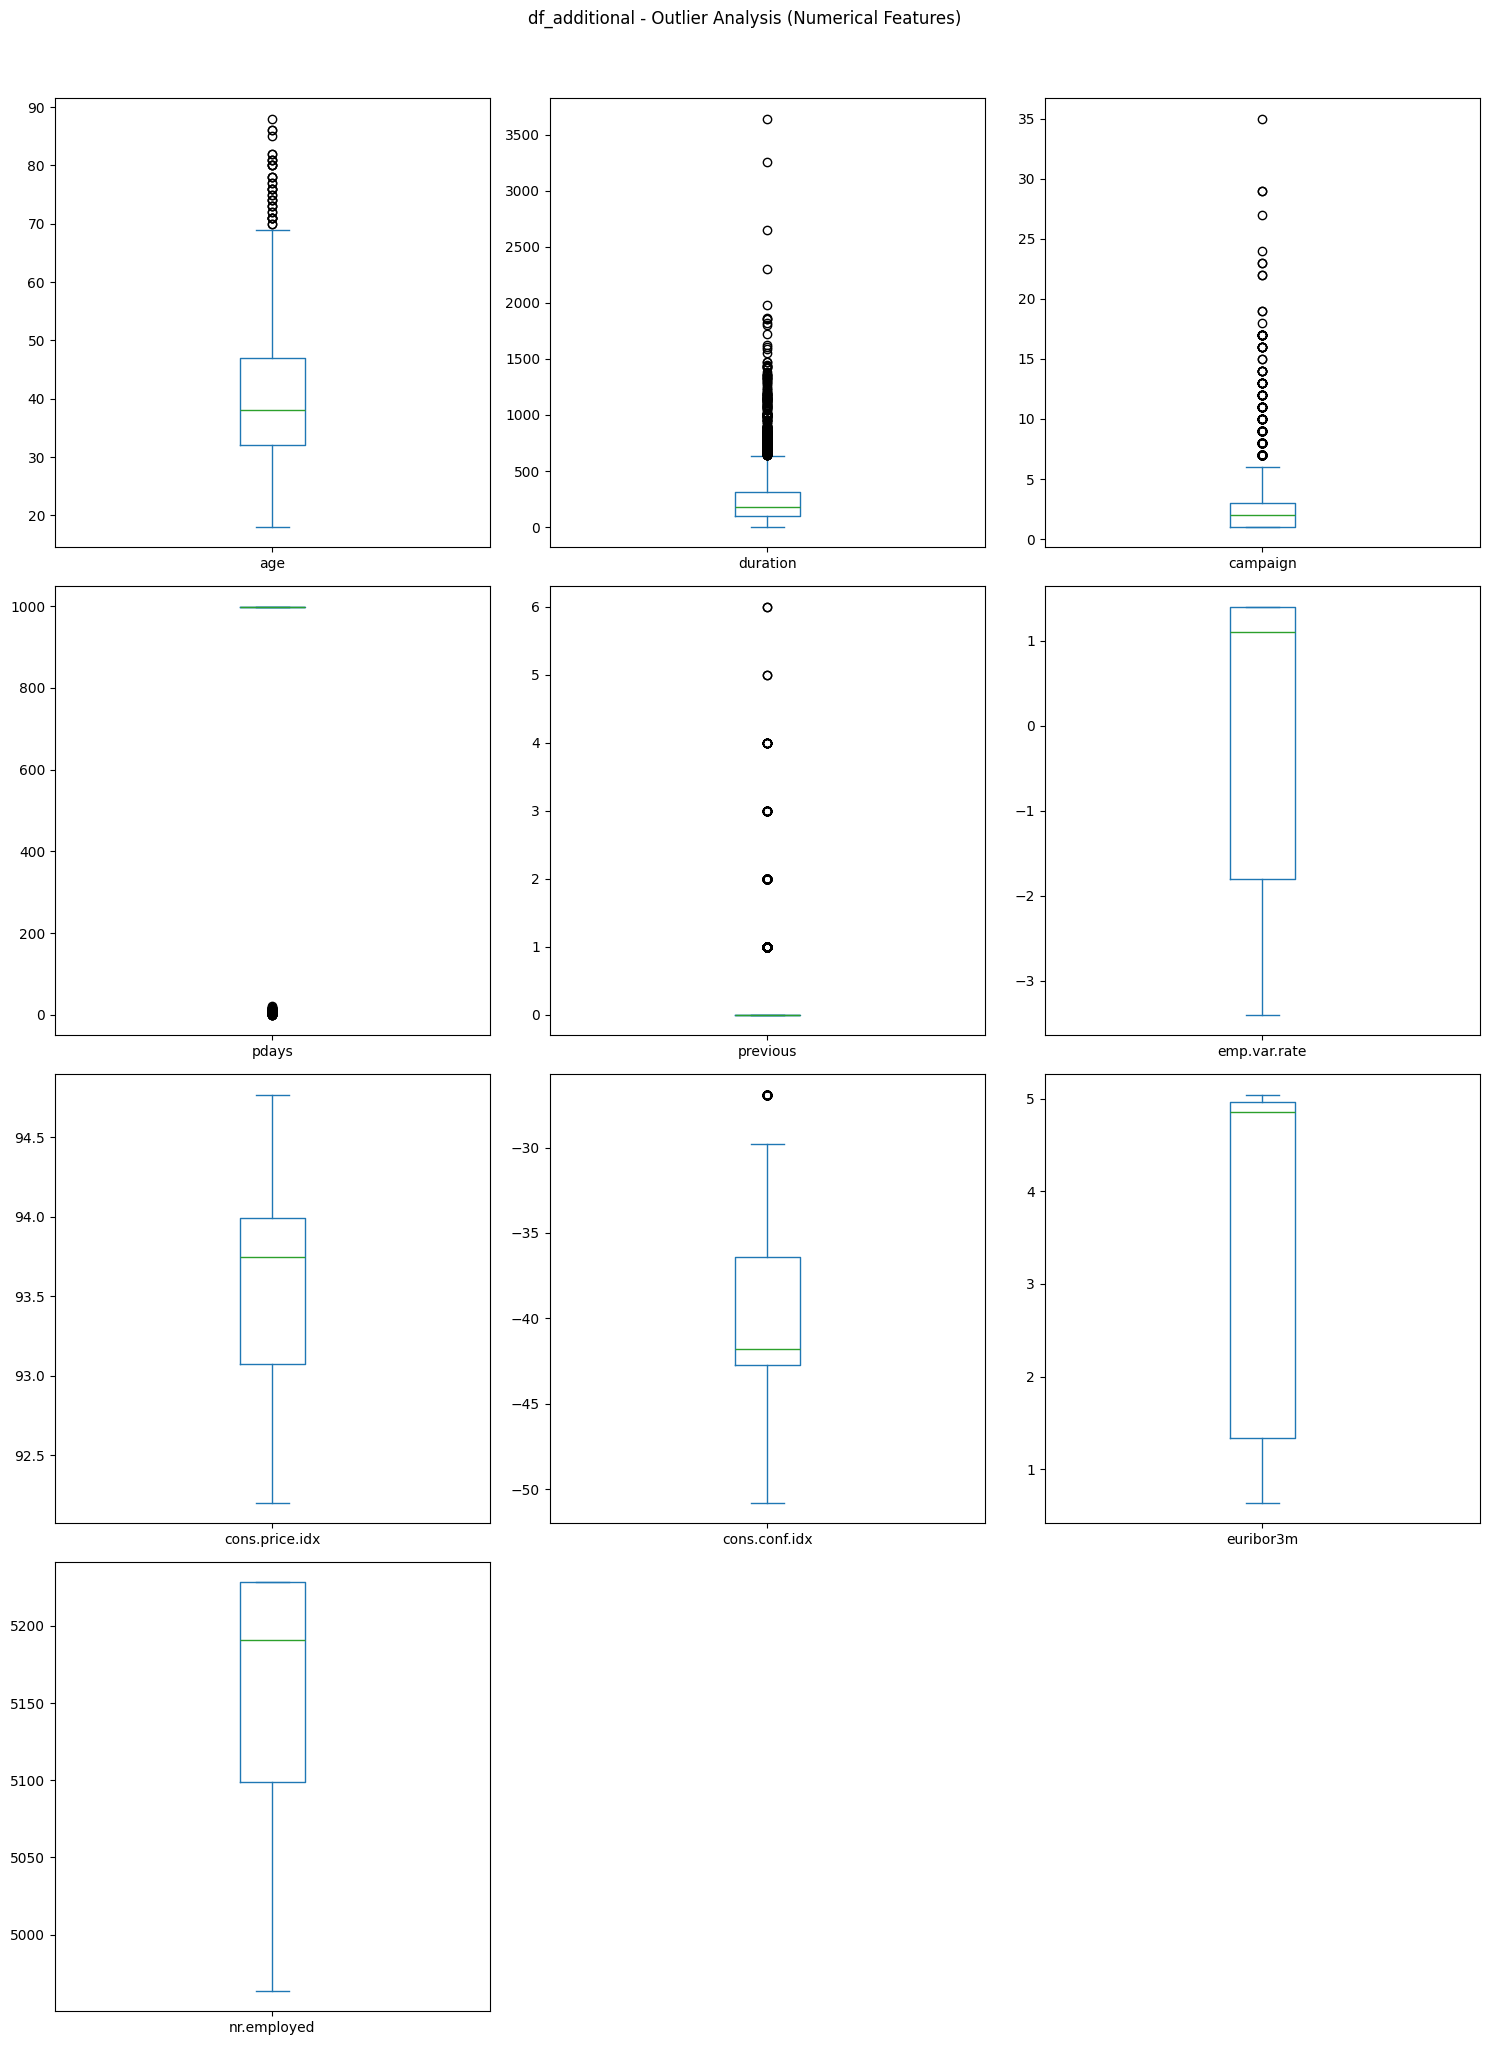


Exploring df_additional_full:
Shape: (41188, 21)
Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
Descriptive Statistics:
                age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              1216

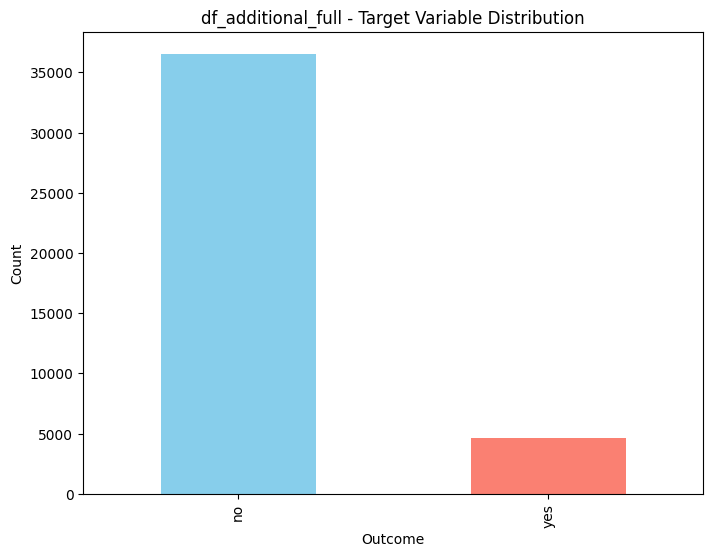

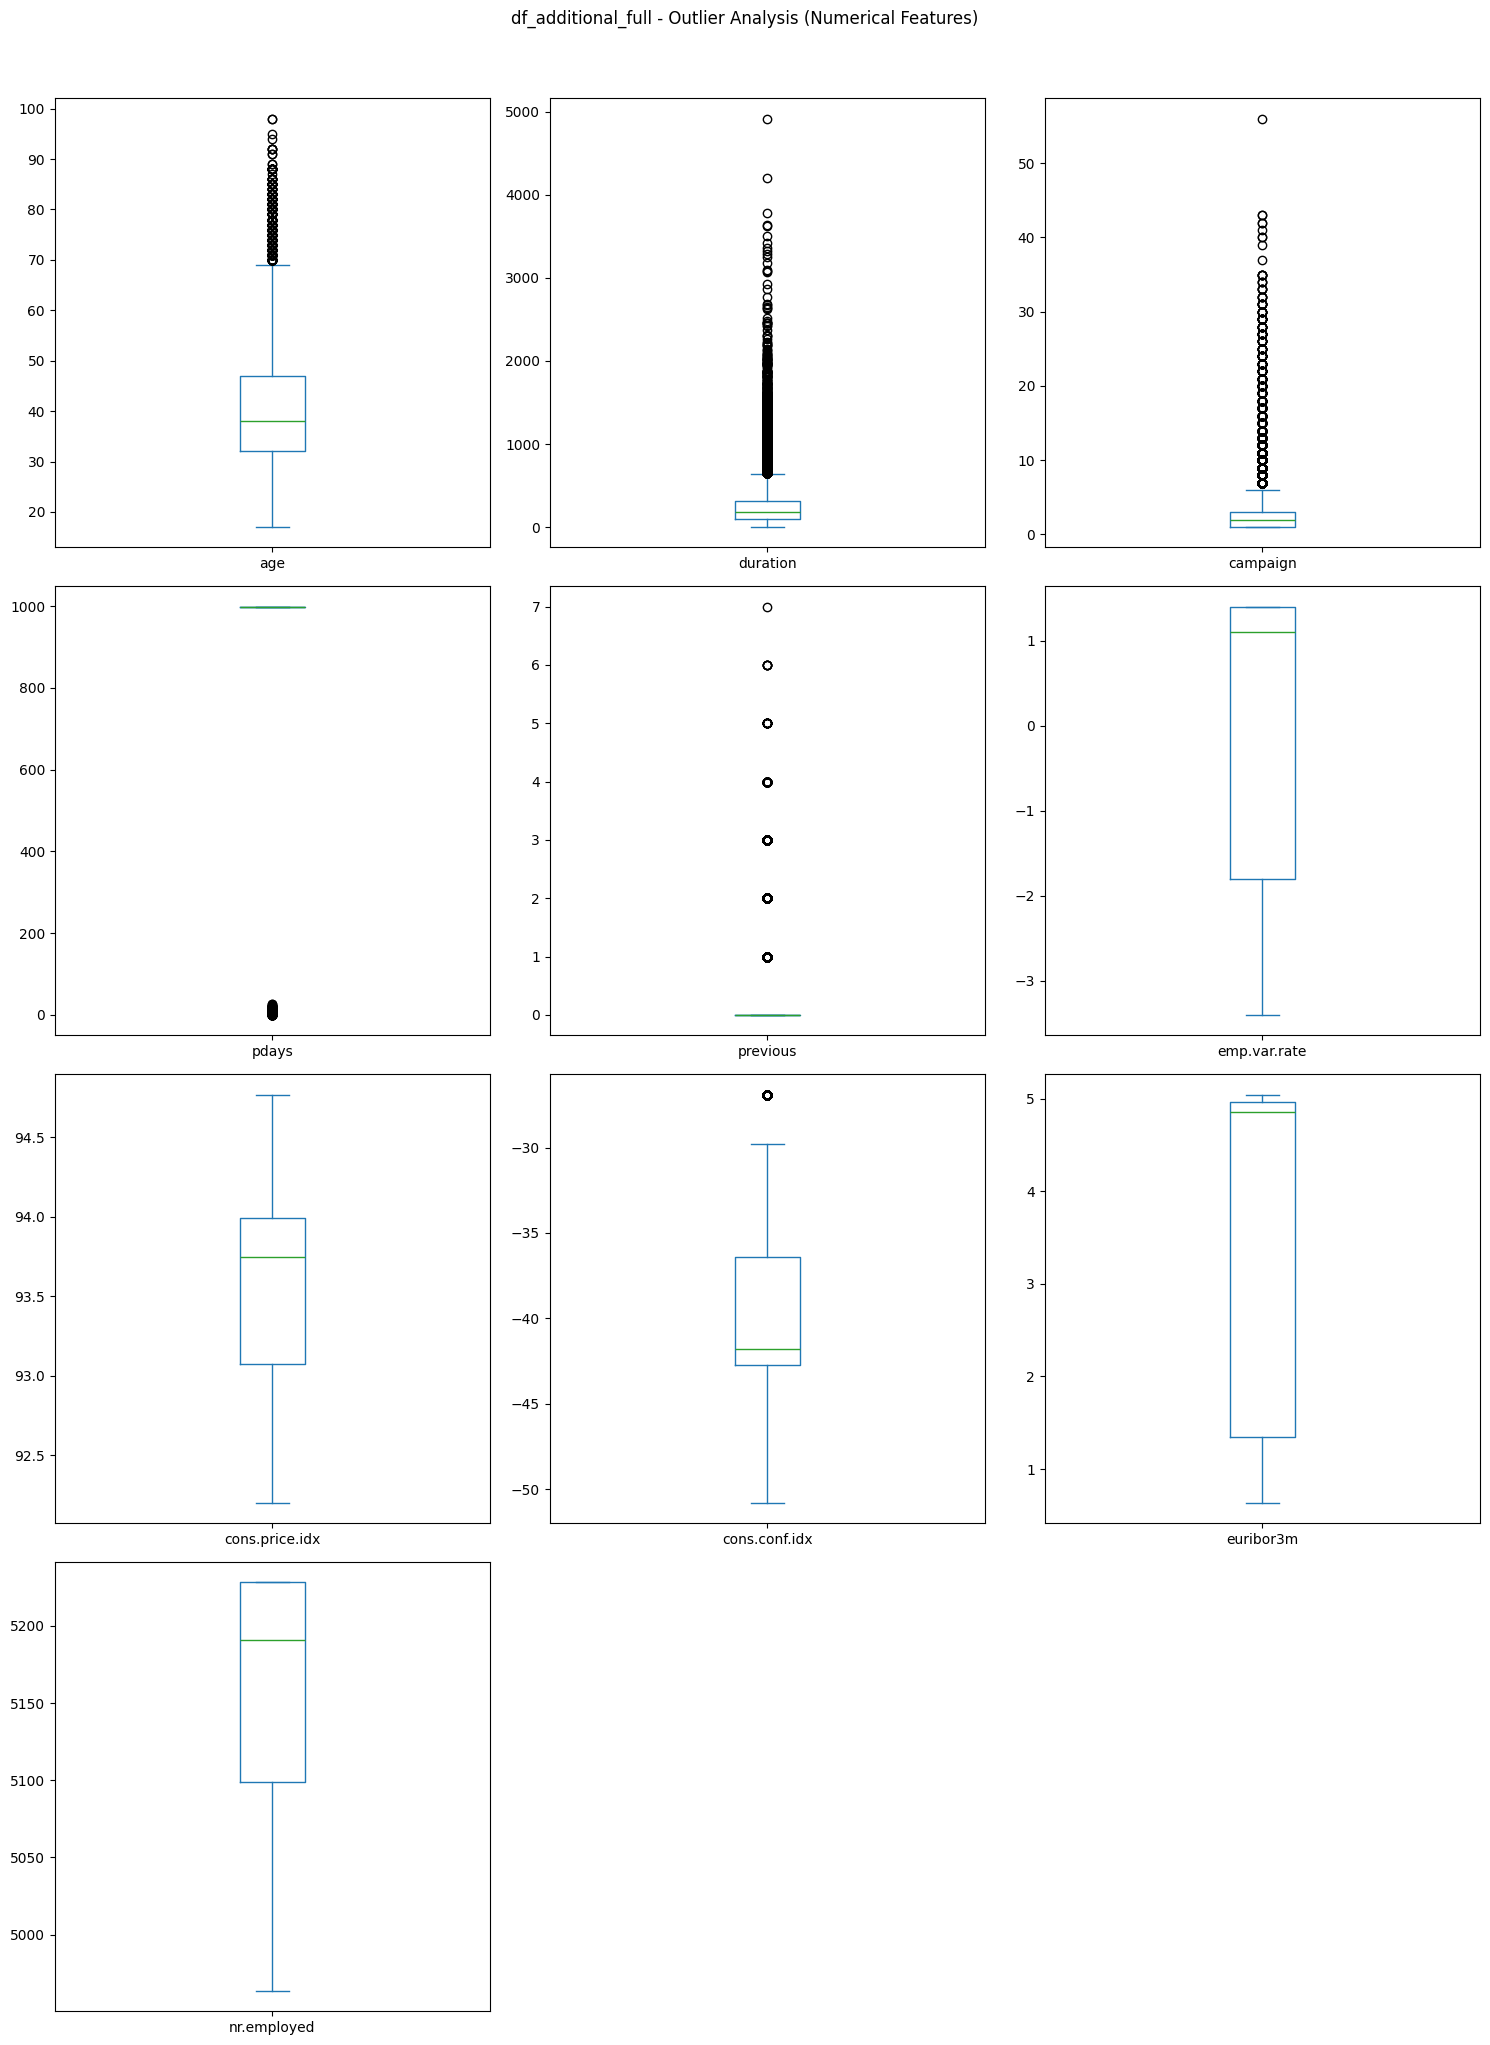


Exploring df_bank:
Shape: (4521, 17)
Data Types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
Descriptive Statistics:
                age         job  marital  education default       balance  \
count   4521.000000        4521     4521       4521    4521   4521.000000   
unique          NaN          12        3          4       2           NaN   
top             NaN  management  married  secondary      no           NaN   
freq            NaN         969     2797       2306    4445           NaN   
mean      41.170095         NaN      NaN        NaN     NaN   1422.657819   
std       10.576211         NaN      NaN        NaN     NaN   3009.638142   
min       19.000000         NaN  

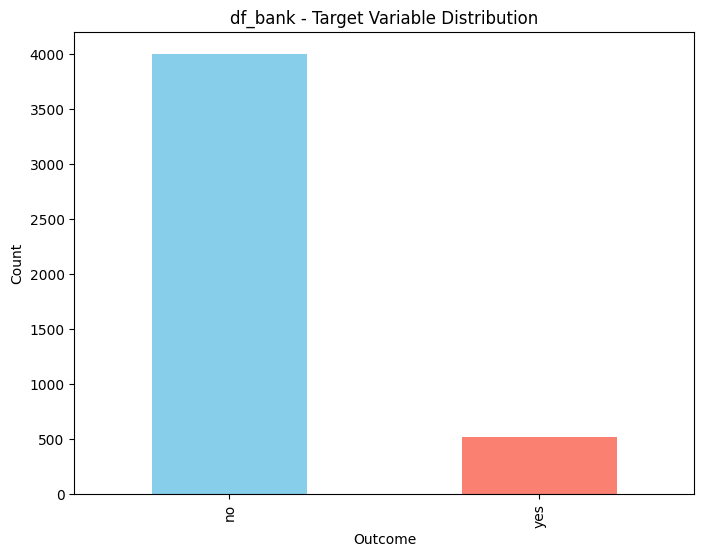

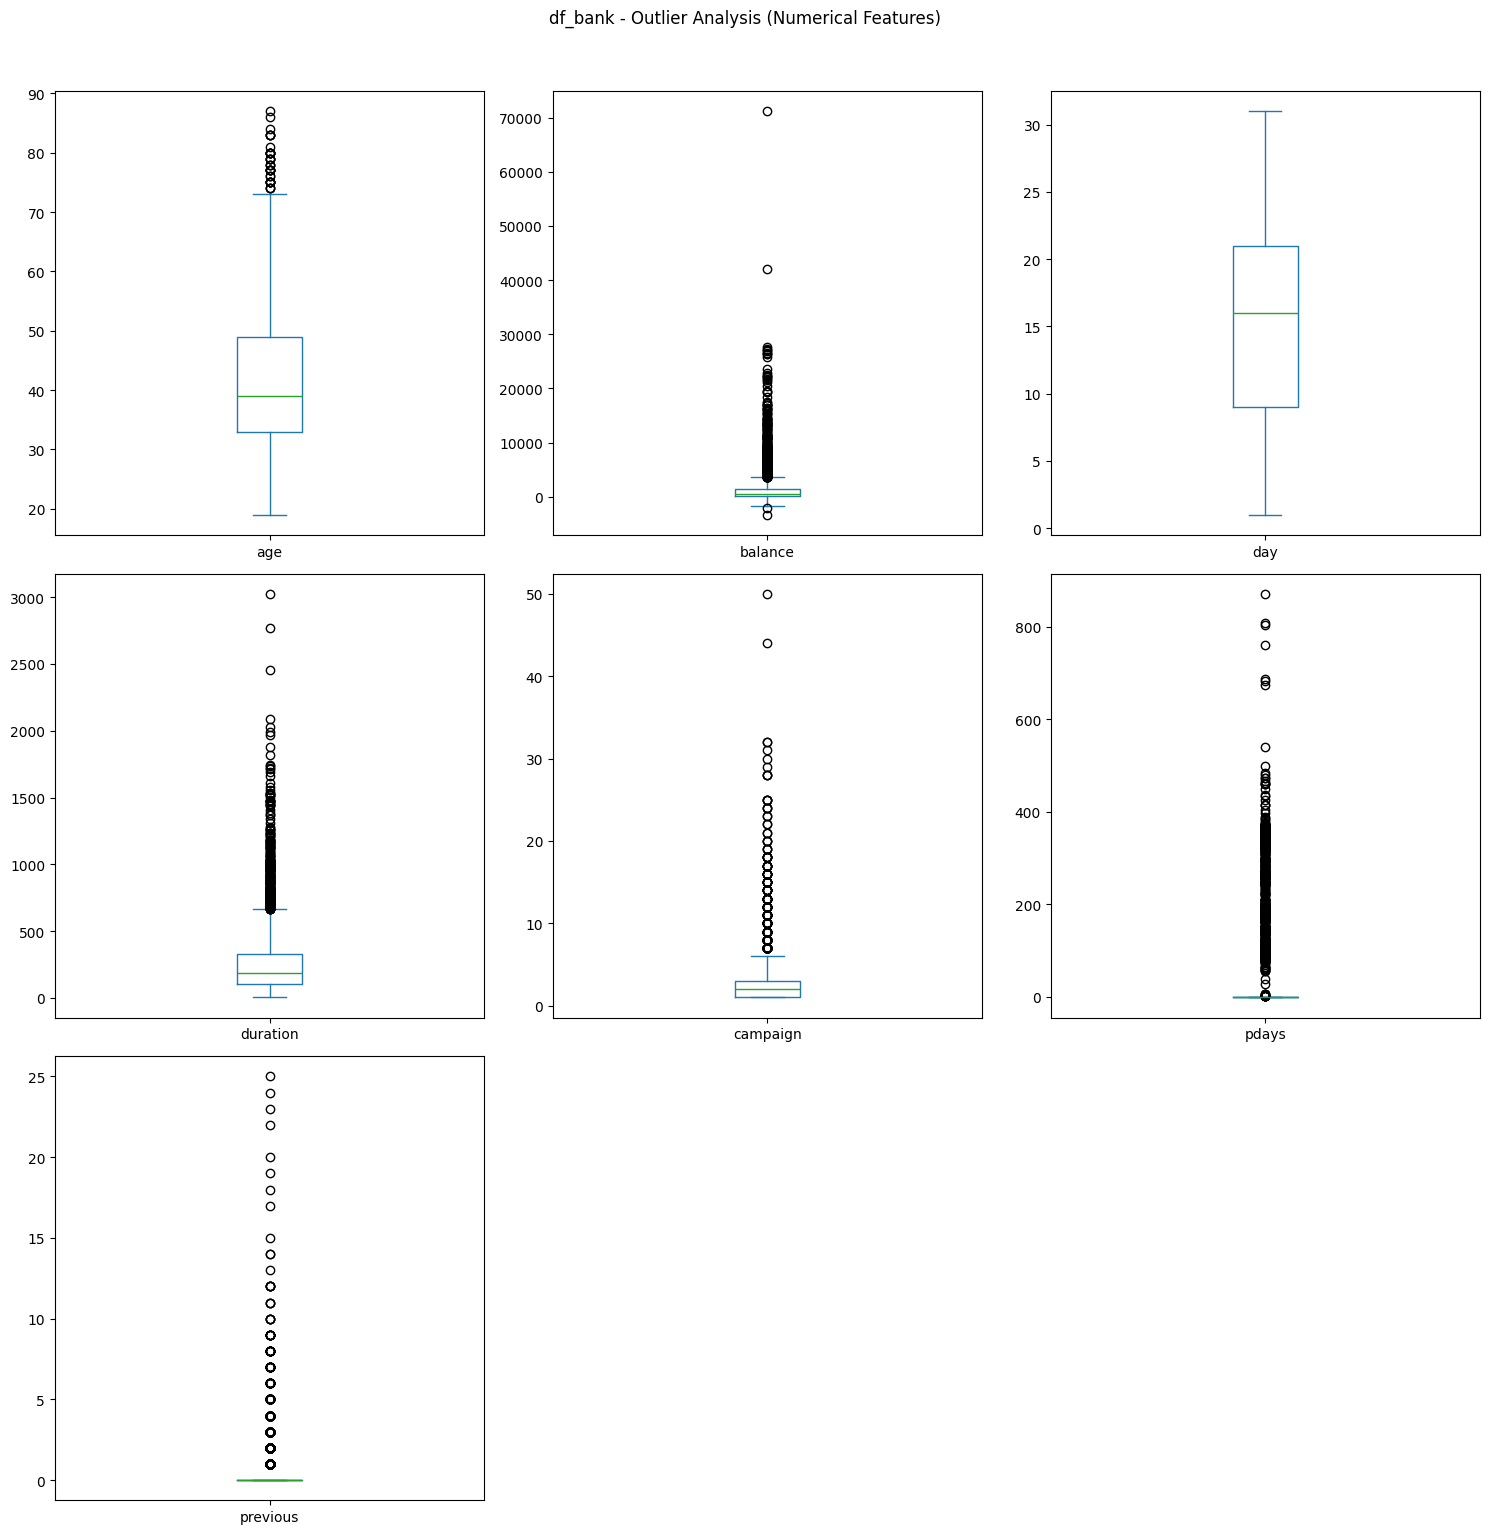


Exploring df_bank_full:
Shape: (45211, 17)
Data Types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
Descriptive Statistics:
                 age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min   

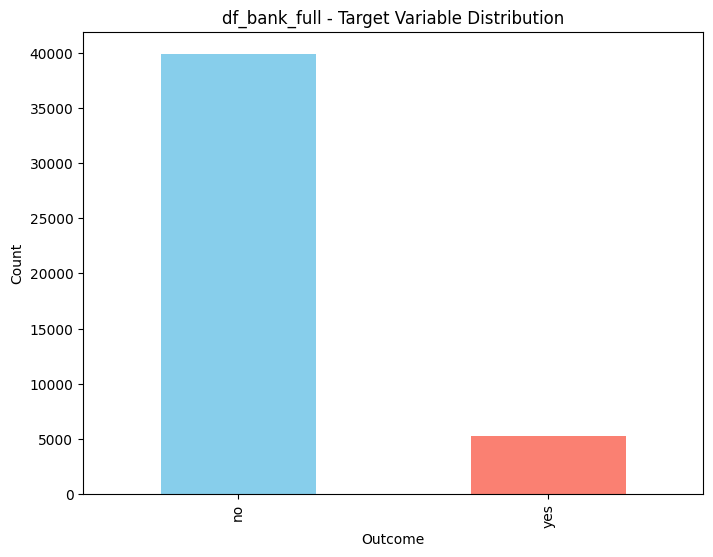

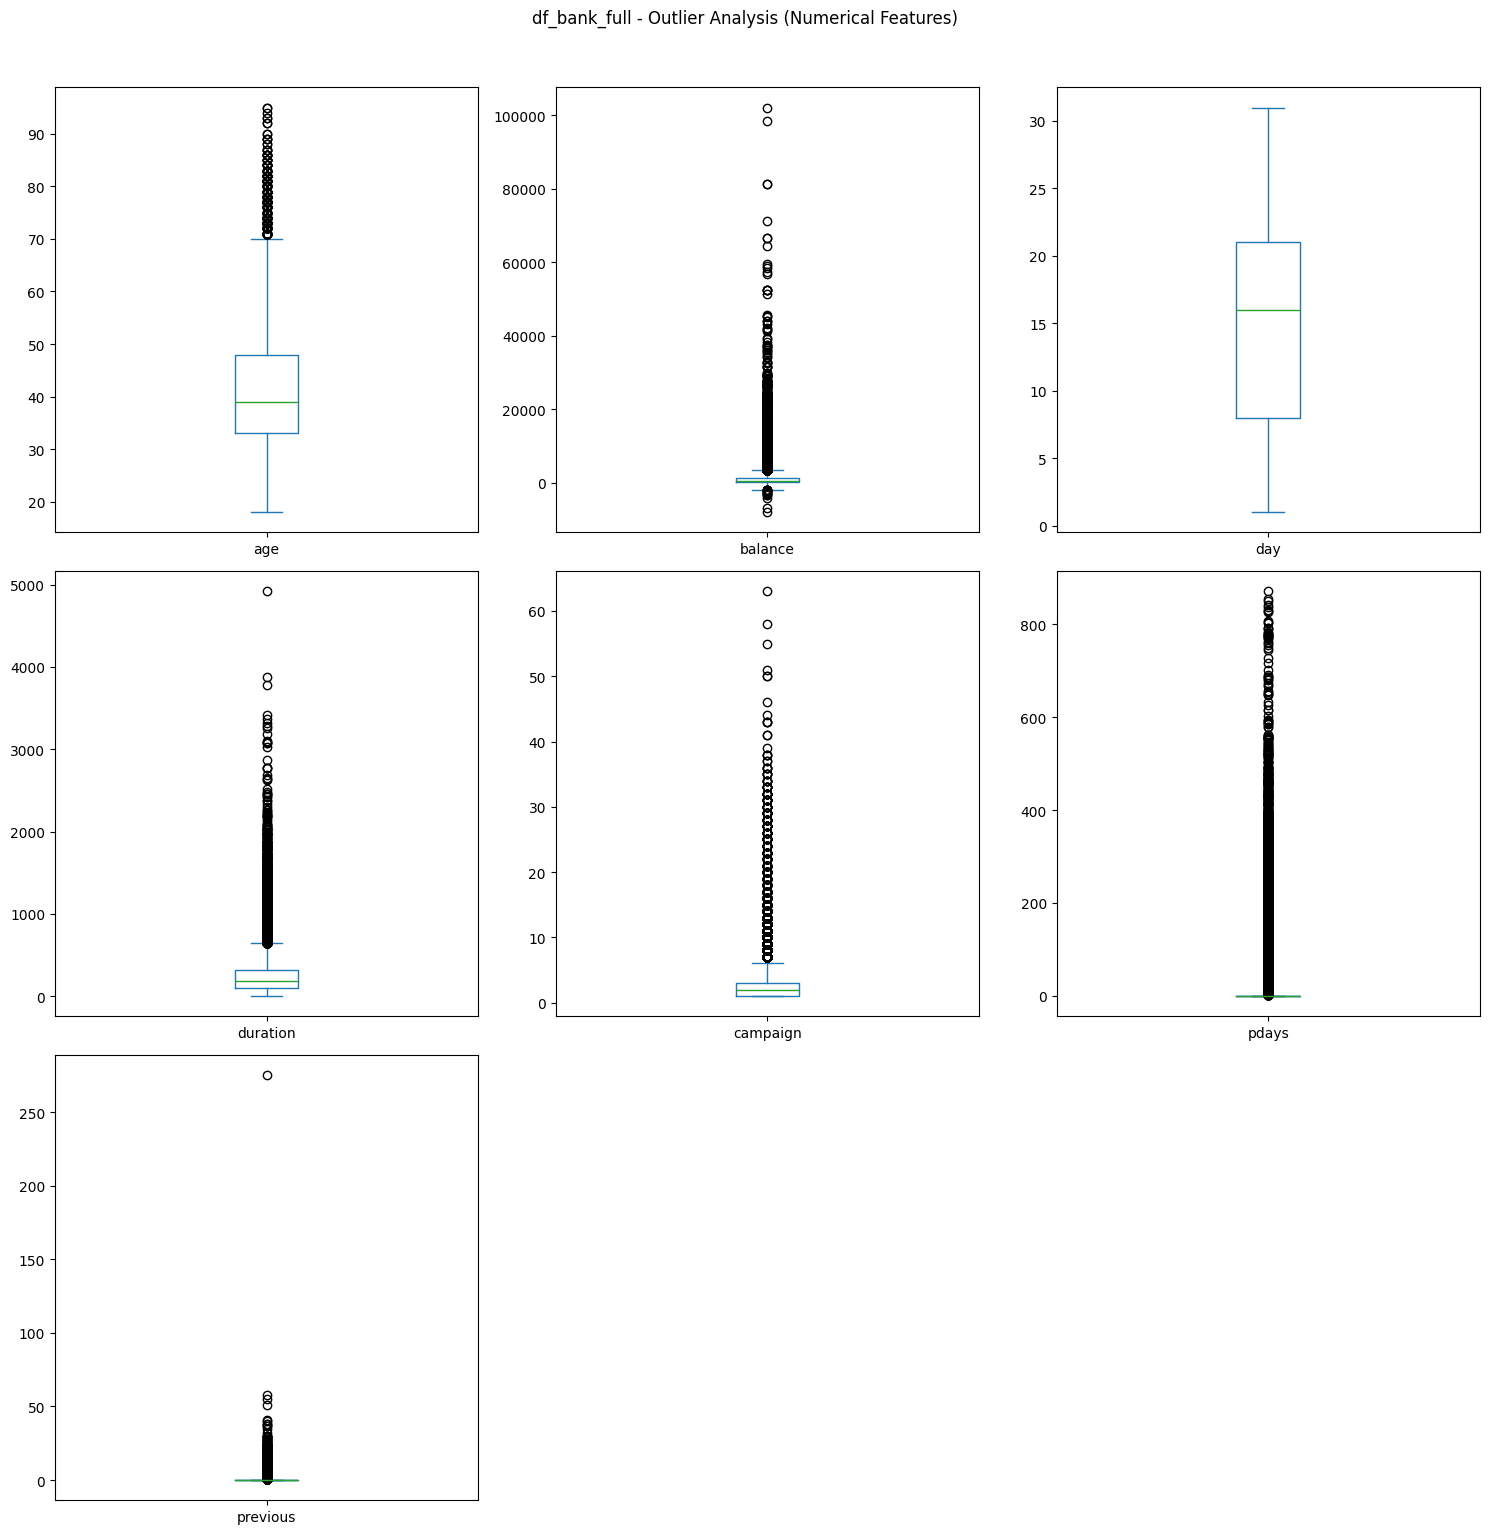


Common Columns Across All Datasets: {'previous', 'default', 'month', 'job', 'age', 'loan', 'y', 'education', 'housing', 'duration', 'campaign', 'poutcome', 'pdays', 'marital', 'contact'}


In [27]:
def explore_dataset(df, name):
    print(f"\nExploring {name}:")
    print(f"Shape: {df.shape}")
    print(f"Data Types:\n{df.dtypes}")
    print(f"Descriptive Statistics:\n{df.describe(include='all')}")

    missing_values = df.isnull().sum() / len(df) * 100
    print(f"Missing Values (%):\n{missing_values}")

    try:
        plt.figure(figsize=(8, 6))
        df['y'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
        plt.title(f'{name} - Target Variable Distribution')
        plt.xlabel('Outcome')
        plt.ylabel('Count')
        plt.show()
    except KeyError:
        print(f"Target column 'y' not found in {name}")

    numerical_cols = df.select_dtypes(include=np.number).columns
    if len(numerical_cols) > 0:
        df[numerical_cols].plot(kind='box', subplots=True, layout=(len(numerical_cols) // 3 + 1, 3), figsize=(15, 5 * (len(numerical_cols) // 3 + 1)))
        plt.suptitle(f'{name} - Outlier Analysis (Numerical Features)', y=1.02)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No numerical columns found in {name} for outlier analysis")


explore_dataset(df_additional, 'df_additional')
explore_dataset(df_additional_full, 'df_additional_full')
explore_dataset(df_bank, 'df_bank')
explore_dataset(df_bank_full, 'df_bank_full')

common_cols = set(df_additional.columns) & set(df_additional_full.columns) & set(df_bank.columns) & set(df_bank_full.columns)
print("\nCommon Columns Across All Datasets:", common_cols)


In [28]:
print("\nComparative Analysis of Target Variable Distributions:")
for df_name, df in zip(['df_additional', 'df_additional_full', 'df_bank', 'df_bank_full'],
                       [df_additional, df_additional_full, df_bank, df_bank_full]):
    print(f"\n{df_name}:")
    print(df['y'].value_counts(normalize=True) * 100)


numerical_cols = list(common_cols - {'y', 'poutcome', 'contact', 'month', 'day_of_week', 'job', 'marital', 'education', 'default', 'housing', 'loan'})
print("\nComparing numerical features across datasets...")
for col in numerical_cols:
  print(f"\n{col}:")
  for df_name, df in zip(['df_additional', 'df_additional_full', 'df_bank', 'df_bank_full'],
                       [df_additional, df_additional_full, df_bank, df_bank_full]):
    if col in df.columns:
        print(f"{df_name}: Mean={df[col].mean():.2f}, Std={df[col].std():.2f}, Min={df[col].min()}, Max={df[col].max()}")
    else:
        print(f"{df_name}: Column not found")

print("\nClarifying column names (example - first 5):")
first_five_lines = column_names_text.strip().split('\n')[:5]
for line in first_five_lines:
    print(line)


Comparative Analysis of Target Variable Distributions:

df_additional:
y
no     89.05074
yes    10.94926
Name: proportion, dtype: float64

df_additional_full:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

df_bank:
y
no     88.476001
yes    11.523999
Name: proportion, dtype: float64

df_bank_full:
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

Comparing numerical features across datasets...

previous:
df_additional: Mean=0.19, Std=0.54, Min=0, Max=6
df_additional_full: Mean=0.17, Std=0.49, Min=0, Max=7
df_bank: Mean=0.54, Std=1.69, Min=0, Max=25
df_bank_full: Mean=0.58, Std=2.30, Min=0, Max=275

age:
df_additional: Mean=40.11, Std=10.31, Min=18, Max=88
df_additional_full: Mean=40.02, Std=10.42, Min=17, Max=98
df_bank: Mean=41.17, Std=10.58, Min=19, Max=87
df_bank_full: Mean=40.94, Std=10.62, Min=18, Max=95

duration:
df_additional: Mean=256.79, Std=254.70, Min=0, Max=3643
df_additional_full: Mean=258.29, Std=259.28, Min=0, Max=4918
df_bank: 

In [29]:
df_combined = df_additional_full.copy()

# Replace 'unknown' with NaN for imputation
df_combined = df_combined.replace('unknown', np.nan)

numerical_cols = df_combined.select_dtypes(include=np.number).columns
imputer_numerical = SimpleImputer(strategy='mean')
df_combined[numerical_cols] = imputer_numerical.fit_transform(df_combined[numerical_cols])

categorical_cols = df_combined.select_dtypes(exclude=np.number).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
df_combined[categorical_cols] = imputer_categorical.fit_transform(df_combined[categorical_cols])


ordinal_features = ['education'] # Assuming education is ordinal
nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

label_encoder = LabelEncoder()
for feature in ordinal_features:
    df_combined[feature] = label_encoder.fit_transform(df_combined[feature])

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = onehot_encoder.fit_transform(df_combined[nominal_features])
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(nominal_features))
df_combined = df_combined.drop(nominal_features, axis=1)
df_combined = pd.concat([df_combined, encoded_df], axis=1)

# Convert target variable to numerical (0 and 1)
df_combined['y'] = df_combined['y'].map({'no': 0, 'yes': 1})

display(df_combined.head())
print(df_combined.shape)
print(df_combined.isnull().sum())

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56.0,0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57.0,3,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37.0,3,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40.0,1,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56.0,3,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


(41188, 52)
age                     0
education               0
duration                0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
cons.price.idx          0
cons.conf.idx           0
euribor3m               0
nr.employed             0
y                       0
job_admin.              0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
marital_divorced        0
marital_married         0
marital_single          0
default_no              0
default_yes             0
housing_no              0
housing_yes             0
loan_no                 0
loan_yes                0
contact_cellular        0
contact_telephone       0
month_apr               0
month_aug               0
month_dec               0
month_jul               0


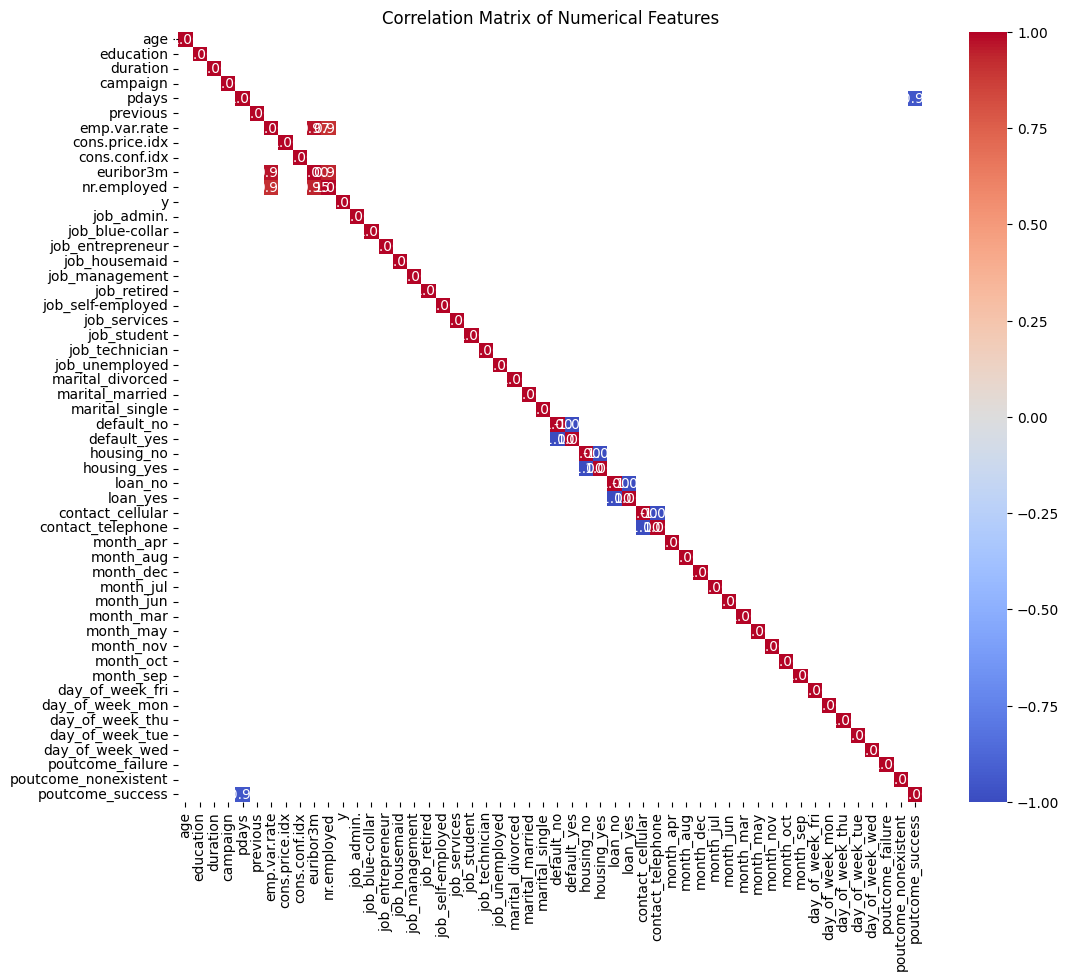

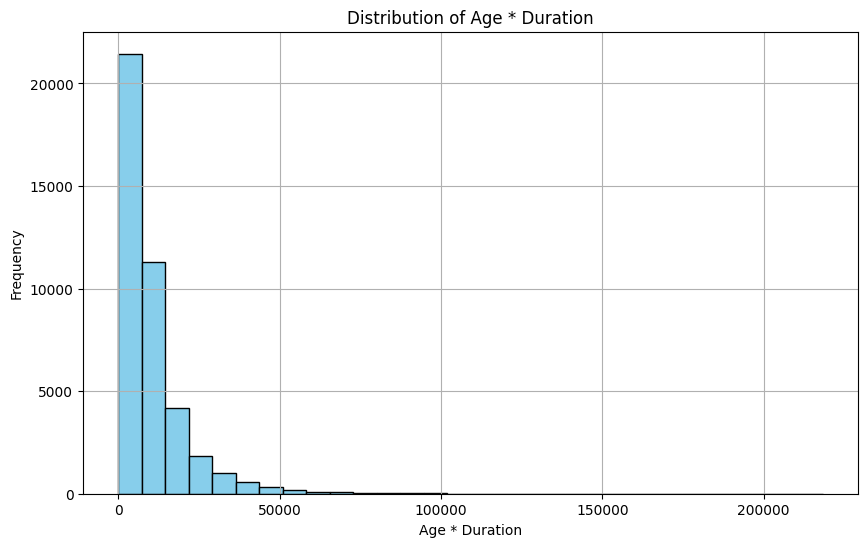

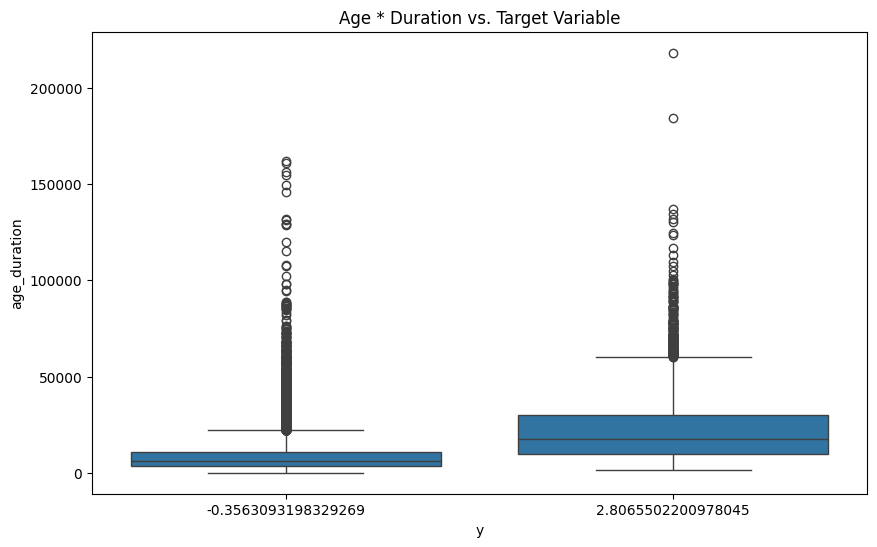

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age_duration,age_campaign
0,1.533034,-1.780318,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,...,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,14616.0,56.0
1,1.628993,-0.338826,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,...,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,8493.0,57.0
2,-0.290186,-0.338826,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,...,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,8362.0,37.0
3,-0.002309,-1.299821,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,...,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,6040.0,40.0
4,1.533034,-0.338826,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,...,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,17192.0,56.0


In [30]:
numerical_cols = df_combined.select_dtypes(include=['number']).columns
correlation_matrix = df_combined[numerical_cols].corr()

highly_correlated = correlation_matrix[abs(correlation_matrix) > 0.9]
plt.figure(figsize=(12, 10))
sns.heatmap(highly_correlated, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

df_combined['age_duration'] = df_combined['age'] * df_combined['duration']
df_combined['age_campaign'] = df_combined['age'] * df_combined['campaign']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_combined[numerical_cols])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols, index=df_combined.index)
df_combined[numerical_cols] = scaled_df

plt.figure(figsize=(10, 6))
df_combined['age_duration'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age * Duration')
plt.xlabel('Age * Duration')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age_duration', data=df_combined)
plt.title('Age * Duration vs. Target Variable')
plt.show()

display(df_combined.head())

In [31]:
# Assuming 'y' is the target variable and all other columns are features
X = df_combined.drop('y', axis=1)
y = df_combined['y']

# Split data into training (70%) and temporary validation/test set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temporary validation/test set into validation (15%) and test sets (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (28831, 53), y_train shape: (28831,)
X_val shape: (6178, 53), y_val shape: (6178,)
X_test shape: (6179, 53), y_test shape: (6179,)


In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

y_train = y_train.astype(int)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='roc_auc', cv=5)

grid_search.fit(X_val, y_val)

best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print(f"Best Score: {best_score}")
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Estimator: {best_estimator}")

Best Score: 0.9221049738577672
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np

y_pred = best_estimator.predict(X_test)

y_test_filtered = np.where(y_test > 1, 1, y_test)
y_pred_filtered = np.where(y_pred > 1, 1, y_pred)

accuracy = accuracy_score(y_test_filtered, y_pred_filtered)
precision = precision_score(y_test_filtered, y_pred_filtered)
recall = recall_score(y_test_filtered, y_pred_filtered)
f1 = f1_score(y_test_filtered, y_pred_filtered)
auc_roc = roc_auc_score(y_test_filtered, y_pred_filtered)
cm = confusion_matrix(y_test_filtered, y_pred_filtered)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {auc_roc}")

cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
display(cm_df)

Accuracy: 0.9048389707072342
Precision: 0.576056338028169
Recall: 0.5876436781609196
F1 Score: 0.5817923186344239
AUC-ROC: 0.7663733619693892


,Predicted 0,Predicted 1
Actual 0,5182,301
Actual 1,287,409


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np

y_pred = best_estimator.predict(X_test)

y_test_filtered = np.where(y_test > 1, 1, y_test)
y_pred_filtered = np.where(y_pred > 1, 1, y_pred)

accuracy = accuracy_score(y_test_filtered, y_pred_filtered)
precision = precision_score(y_test_filtered, y_pred_filtered)
recall = recall_score(y_test_filtered, y_pred_filtered)
f1 = f1_score(y_test_filtered, y_pred_filtered)
auc_roc = roc_auc_score(y_test_filtered, y_pred_filtered)
cm = confusion_matrix(y_test_filtered, y_pred_filtered)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {auc_roc}")

cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
display(cm_df)

Accuracy: 0.9048389707072342
Precision: 0.576056338028169
Recall: 0.5876436781609196
F1 Score: 0.5817923186344239
AUC-ROC: 0.7663733619693892


,Predicted 0,Predicted 1
Actual 0,5182,301
Actual 1,287,409
